## deadline for 12.05


## Exercise 1 (4 points)

Prove following equalities:

1. $P(O | Q, \lambda)=\prod_{t=1}^{T} b_{q_{t}}\left(o_{t}\right).$ (2 points)
2. $P(O | \lambda)=\sum_{q_{1} \ldots q_{T} \in \mathbb{Q}_{\mathbb{T}}} \mu_{q_{1}} b_{q_{1}}\left(o_{1}\right) a_{q_{1} q_{2}} b_{q_{2}}\left(o_{2}\right) \ldots a_{q_{T-1} q_{T}} b_{q_{T}}\left(o_{T}\right).$ (2 points)


## Exercise 2 (4 points)

You know that among the crewmates of a space ship there are two impostors. Your task is to identify them.
Luckily every crewmate has a secret code to identify himself. Unluckily you don't know them. But you know how the correct one looks like.

1. Fit HMM to file `secret_message_base.txt`, you can use an existing HMM implementation (for instance hmmlearn or ssm, but feel free to find your own).
2. Compute likelihood of these data samples. Do scatterplots of points in observations.
3. Compute the likelihood of observations in files whose names start with color names. Do a scatterplot of this file. Can you see a difference from the observation coming from previous file?
4. Can you use likelihoods to identify impostors?


In [1]:
from hmmlearn import hmm
import numpy as np
import matplotlib.pyplot as plt
import os
import ssm
from sklearn.cluster import KMeans

/Users/clarkhu/opt/anaconda3/envs/hmm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def get_data(path):
    with open(path, 'r') as f:
        lines = f.read().split('\n')
        lines = list(filter(None, lines))

    data = np.empty((len(lines), 2))

    for i, line in enumerate(lines):
        values = line.split()
        data[i, 0] = float(values[0])
        data[i, 1] = float(values[1])
    return data

##### class hmmlearn.hmm.GaussianHMM(n_components=1, covariance_type='diag', min_covar=0.001, startprob_prior=1.0, transmat_prior=1.0, means_prior=0, means_weight=0, covars_prior=0.01, covars_weight=1, algorithm='viterbi', random_state=None, n_iter=10, tol=0.01, verbose=False, params='stmc', init_params='stmc', implementation='log')


score_samples(X, lengths=None)
Compute the log probability under the model and compute posteriors.

Returns
:
log_prob (float) – Log likelihood of X.

posteriors (array, shape (n_samples, n_components)) – State-membership probabilities for each sample in X.


usage[hmm.GaussianHMM](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/generated/sklearn.hmm.GaussianHMM.html)


In [3]:
secret_msg = get_data('./secret_message_base.txt')
model = hmm.GaussianHMM(n_components=2, covariance_type='full')
model.fit(secret_msg)
log_likelihood = model.score(secret_msg)
print("Log-likelihood of the data samples:", log_likelihood)

Log-likelihood of the data samples: -39277.36398645093


In [4]:

log_probs, state  = model.decode(secret_msg)
log_probs

-39277.36398645115

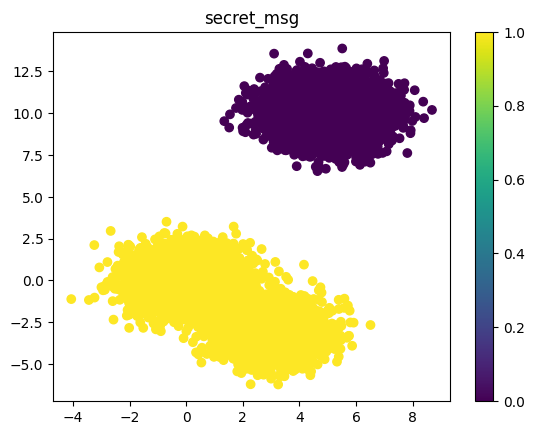

In [5]:
plt.scatter(secret_msg[:, 0], secret_msg[:, 1], c= state)
plt.title('secret_msg')
plt.colorbar()
plt.show()

#### 3. Compute the likelihood of observations in files whose names start with color names. Do a scatterplot of this file. Can you see a difference from the observation coming from previous file?


Log-likelihood of the data samples: -3699.8435971129516


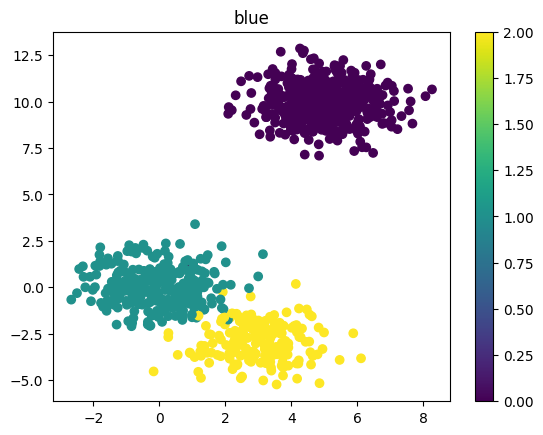

Log-likelihood of the data samples: -3729.4344625163235


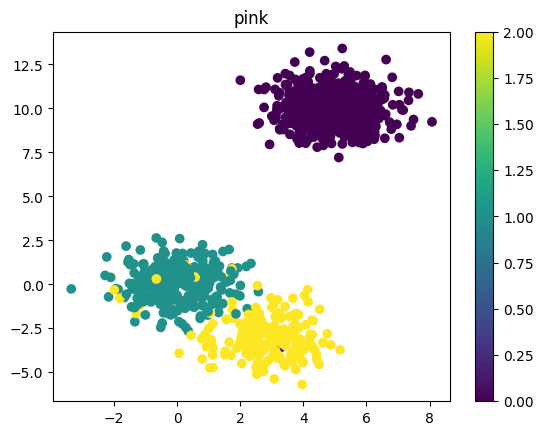

Log-likelihood of the data samples: -3693.633394507851


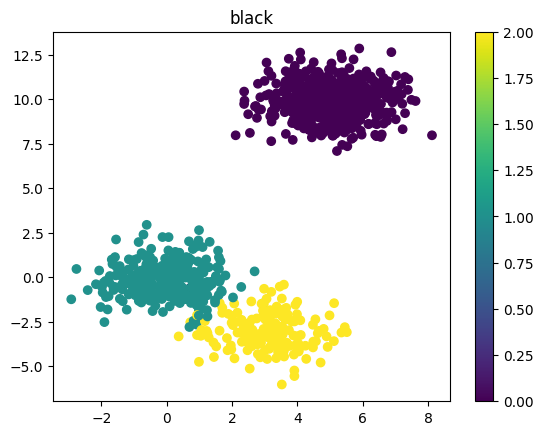

Log-likelihood of the data samples: -3654.194415991844


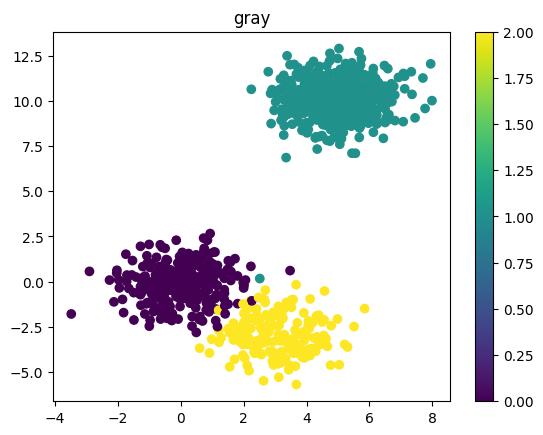

Log-likelihood of the data samples: -3750.7945552250153


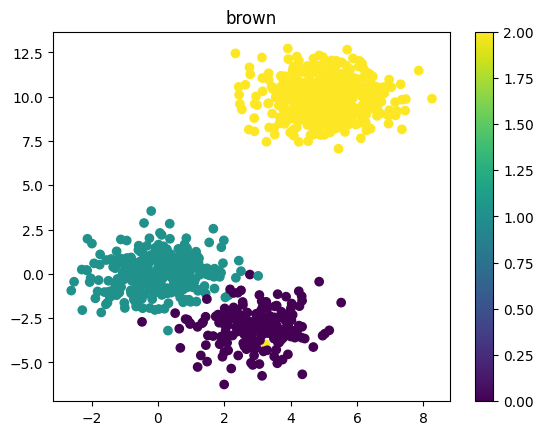

Log-likelihood of the data samples: -4144.317268838107


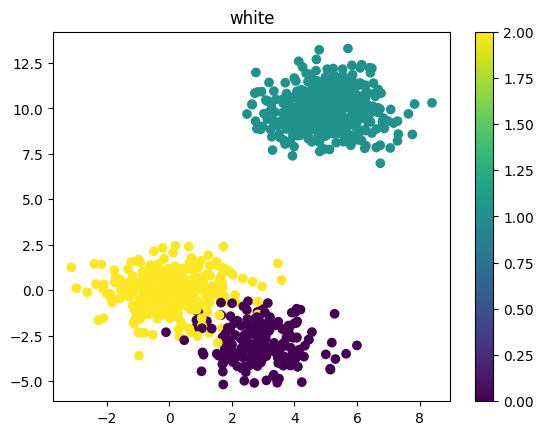

Log-likelihood of the data samples: -3720.5877653752796


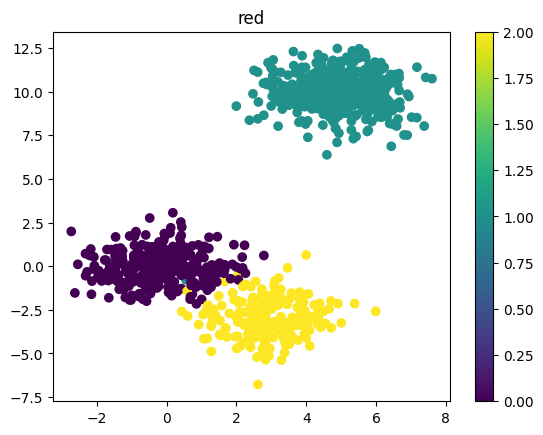

Log-likelihood of the data samples: -4123.812802795924


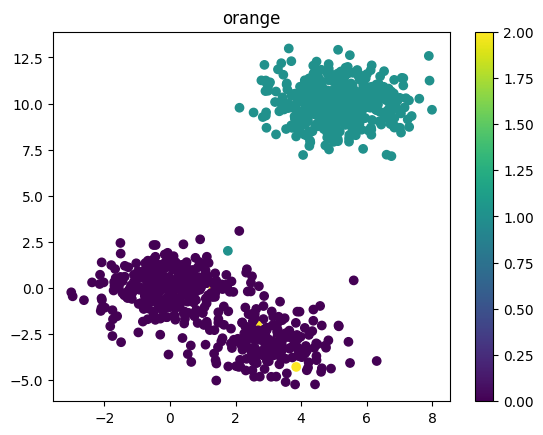

Log-likelihood of the data samples: -4228.436651054618


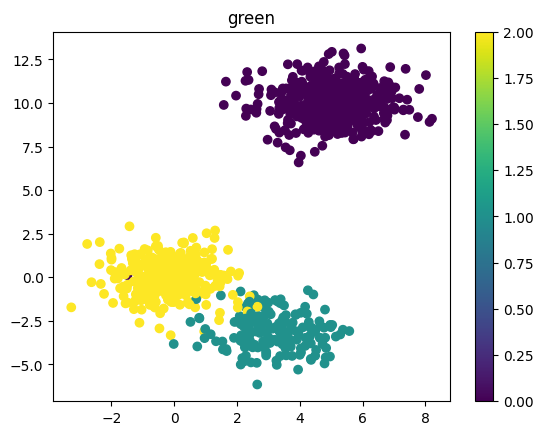

Log-likelihood of the data samples: -3683.9355175351307


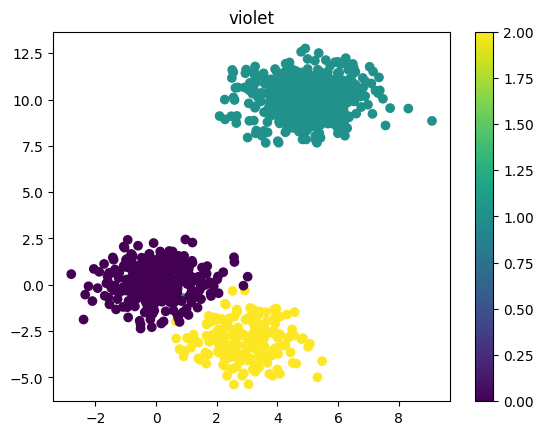

In [6]:

folder_path = './ADM' 

files = os.listdir(folder_path)
txt_files = [file for file in files if file.endswith('.txt')]
colors = {}
for txt_file in txt_files:
    file_path = os.path.join(folder_path, txt_file)
    filename = os.path.splitext(os.path.basename(file_path))[0]
    data  = get_data(file_path)
    model = hmm.GaussianHMM(n_components=3, covariance_type='diag')
    model.fit(secret_msg)
    log_likelihood = model.score(data)
    log_probs, state  = model.decode(data)
    print("Log-likelihood of the data samples:", log_likelihood)
    colors.update({filename:log_likelihood})
    plt.scatter(data[:, 0], data[:, 1], c = state)
    plt.colorbar()
    plt.title(filename)
    plt.show()

#### 4. Can you use likelihoods to identify impostors? most unlikely


In [7]:
colors

{'blue': -3699.8435971129516,
 'pink': -3729.4344625163235,
 'black': -3693.633394507851,
 'gray': -3654.194415991844,
 'brown': -3750.7945552250153,
 'white': -4144.317268838107,
 'red': -3720.5877653752796,
 'orange': -4123.812802795924,
 'green': -4228.436651054618,
 'violet': -3683.9355175351307}

In [8]:
sorted(colors.items(), key=lambda x: x[1])[:2]

[('green', -4228.436651054618), ('white', -4144.317268838107)]

## Exercise 3 (4 points)

Using one of the following libraries [ssm](https://github.com/lindermanlab/ssm) (protip: use fresh conda environment to handle dependencies), [ssm-jax](https://github.com/lindermanlab/ssm-jax) or [dynamax](https://probml.github.io/dynamax/index.html) fit ARHMM (in case of ssm `ssm.HMM(num_states, obs_dim, observations="gaussian")
` in case of ssm-jax `GaussianARHMM`, in case of dynamax `LinearAutoregressiveHMM`) fit the autoregressive model to the data in the file `hexagon.npy`.

1. Decode the states, do the scatterplot of the data using states as colors.
2. Sample new observations from the fitted distribution. Plot them. Do they look similar to the input data? If not try different learning parameters. **Protip** try initializing states with kmeans.
3. Fit HMM with Gaussian Emissions. Decode the states. Do the scatterplot of the data using states as colors.
4. Sample new observations from the HMM with Gaussian Emissions. Compare it with the observations from the ARHMM.


In [9]:
hexagon = np.load('./hexagon.npy')
hexagon.shape

(10000, 2)

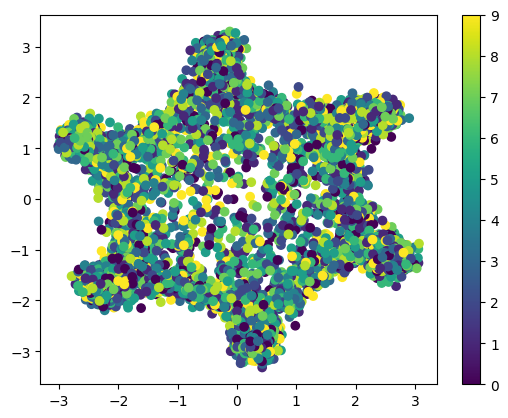

In [10]:
states = np.random.randint(0, 10, 10000)

plt.scatter(hexagon[:, 0], hexagon[:, 1], c=states)

cb = plt.colorbar()
cb.set_ticks(np.unique(states))
cb.set_ticklabels(np.arange(len(np.unique(states))))

plt.show()

### 1. Decode the states, do the scatterplot of the data using states as colors.


LP: 9234.8: 100%|██████████| 100/100 [00:06<00:00, 16.49it/s]


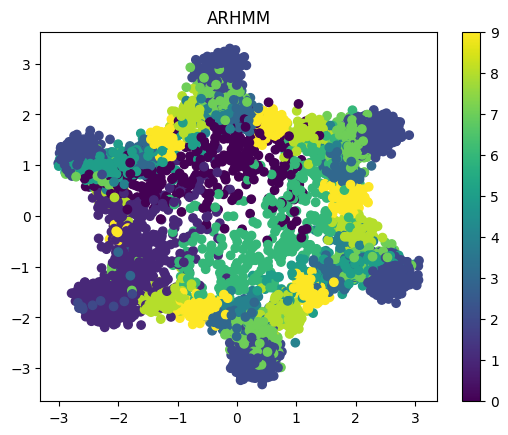

In [11]:
num_states = 10
D = hexagon.shape[1]    # 2 dimension of the observations

arhmm = ssm.HMM(num_states,D, observations="ar")
# arhmm = ssm.HMM(num_states, hexagon.shape[1], observations="gaussian")
arhmm.fit(hexagon)
states = arhmm.most_likely_states(hexagon)
# log_probs, states = arhmm.decode()
plt.scatter(hexagon[:, 0], hexagon[:, 1], c=states)
plt.title('ARHMM')
plt.colorbar()
plt.show()

### 2. Sample new observations from the fitted distribution. Plot them. Do they look similar to the input data? If not try different learning parameters. try initializing states with kmeans.


[Simple-HMM-Demo.md](https://github.com/lindermanlab/ssm/blob/master/doc/notebooks/1-Simple-HMM-Demo.md)


In [12]:
num_states = 10
D = hexagon.shape[1]    # 2 dimension of the observations

arhmm_sample = ssm.HMM(num_states, D , observations="ar")
# arhmm = ssm.HMM(num_states, hexagon.shape[1], observations="gaussian")
arhmm_sample.fit(hexagon)

num_samples = 1000
sampled_states, sampled_data = arhmm_sample.sample(num_samples)


LP: 9200.5: 100%|██████████| 100/100 [00:06<00:00, 15.63it/s]


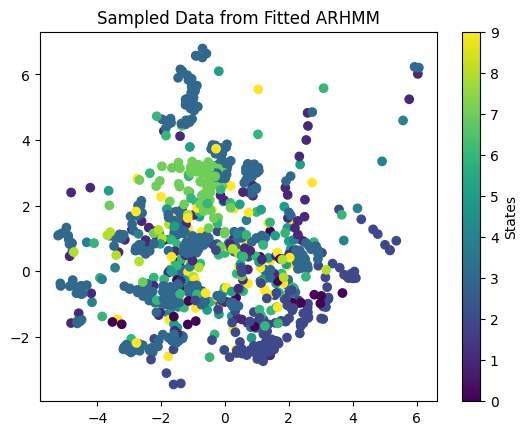

In [13]:
plt.scatter(sampled_data[:, 0], sampled_data[:, 1], c=sampled_states, cmap='viridis')
plt.title('Sampled Data from Fitted ARHMM')
plt.colorbar(label='States')
plt.show()


### initializing states with kmeans


In [14]:
num_states = 10 
kmeans = KMeans(n_clusters=num_states, random_state=0)
kmeans.fit(data)
init_states = kmeans.labels_

model_k = ssm.HMM(K=num_states, D=2)
model_lls = model_k.fit(hexagon, init_state_distn=init_states)

states_k = model_k.most_likely_states(hexagon)


/Users/clarkhu/opt/anaconda3/envs/hmm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
LP: -6931.5: 100%|██████████| 100/100 [00:04<00:00, 21.45it/s]


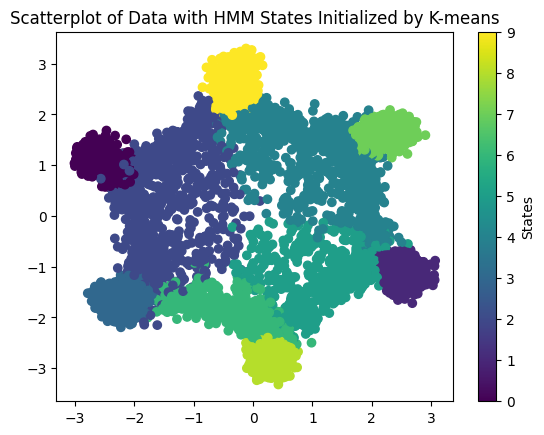

In [15]:
plt.scatter(hexagon[:, 0], hexagon[:, 1], c=states_k, cmap='viridis')
plt.title('Scatterplot of Data with HMM States Initialized by K-means')
plt.colorbar(label='States')
plt.show()

### 3. Fit HMM with Gaussian Emissions. Decode the states. Do the scatterplot of the data using states as colors.


LP: -7366.0: 100%|██████████| 100/100 [00:04<00:00, 21.67it/s]


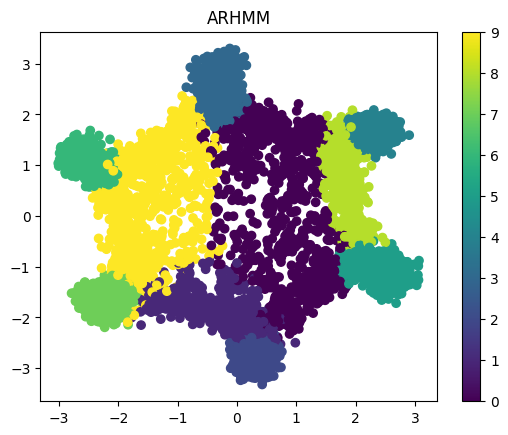

In [16]:
num_states = 10
D = hexagon.shape[1]    # 2 dimension of the observations
# arhmm = ssm.HMM(num_states,D, observations="ar")
arhmm_g = ssm.HMM(num_states, D, observations="gaussian")
arhmm_g.fit(hexagon)

states_g = arhmm_g.most_likely_states(hexagon)

plt.scatter(hexagon[:, 0], hexagon[:, 1], c=states_g)
plt.title('ARHMM')
plt.colorbar()
plt.show()

### 4. Sample new observations from the HMM with Gaussian Emissions. Compare it with the observations from the ARHMM.


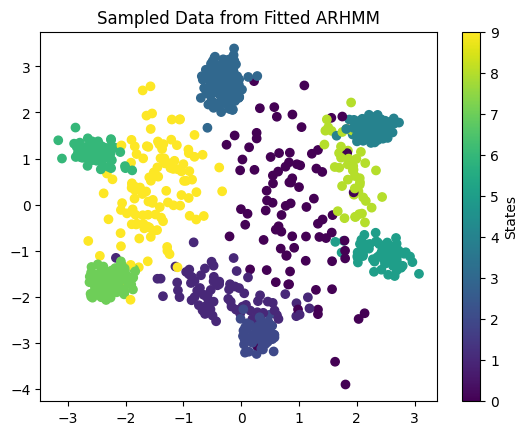

In [17]:
num_samples = 1000
sampled_states_g, sampled_data_g = arhmm_g.sample(num_samples)
plt.scatter(sampled_data_g[:, 0], sampled_data_g[:, 1], c=sampled_states_g, cmap='viridis')
plt.title('Sampled Data from Fitted ARHMM')
plt.colorbar(label='States')
plt.show()
